In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fishdataset/combine/Prediction/fresh fish/local fish (57).jpg
/kaggle/input/fishdataset/combine/Prediction/fresh fish/local fish (6).jpg
/kaggle/input/fishdataset/combine/Prediction/fresh fish/local fish (5).jpg
/kaggle/input/fishdataset/combine/Prediction/fresh fish/local fish (24).jpg
/kaggle/input/fishdataset/combine/Prediction/fresh fish/local fish (42).jpg
/kaggle/input/fishdataset/combine/Prediction/fresh fish/local fish (9).jpg
/kaggle/input/fishdataset/combine/Prediction/fresh fish/local fish (37).jpg
/kaggle/input/fishdataset/combine/Prediction/fresh fish/local fish (30).jpg
/kaggle/input/fishdataset/combine/Prediction/fresh fish/local fish (59).jpg
/kaggle/input/fishdataset/combine/Prediction/fresh fish/local fish (50).jpg
/kaggle/input/fishdataset/combine/Prediction/fresh fish/local fish (20).jpg
/kaggle/input/fishdataset/combine/Prediction/fresh fish/local fish (14).jpg
/kaggle/input/fishdataset/combine/Prediction/fresh fish/local fish (23).jpg
/kaggle/input/f

In [2]:
import os
dircs=os.listdir('/kaggle/input/fishdataset/combine/FishDisease/')

In [3]:
X_directory=[]
y_directory=[]
for directory in dircs:
    image_paths=os.listdir(f'/kaggle/input/fishdataset/combine/FishDisease/{directory}')
    for img_name in image_paths:
        X_directory.append(f'/kaggle/input/fishdataset/combine/FishDisease/{directory}/{img_name}')
        y_directory.append(directory)

In [4]:
df={"fishimages":X_directory,"fishlabels":y_directory}

In [5]:
df = pd.DataFrame(df)
df.style

,fishimages,fishlabels
0,/kaggle/input/fishdataset/combine/FishDisease/white spot/white-spot-166.png,white spot
1,/kaggle/input/fishdataset/combine/FishDisease/white spot/white-spot-246.png,white spot
2,/kaggle/input/fishdataset/combine/FishDisease/white spot/white-spot-263.png,white spot
3,/kaggle/input/fishdataset/combine/FishDisease/white spot/white-spot-264.png,white spot
4,/kaggle/input/fishdataset/combine/FishDisease/white spot/white-spot-92.png,white spot
5,/kaggle/input/fishdataset/combine/FishDisease/white spot/white-spot-123.png,white spot
6,/kaggle/input/fishdataset/combine/FishDisease/white spot/white-spot-93.png,white spot
7,/kaggle/input/fishdataset/combine/FishDisease/white spot/white-spot-29.png,white spot
8,/kaggle/input/fishdataset/combine/FishDisease/white spot/white-spot-223.png,white spot
9,/kaggle/input/fishdataset/combine/FishDisease/white spot/white-spot-45.png,white spot


In [6]:
import pandas as pd
import numpy as np
df=pd.DataFrame(df)

In [7]:
from sklearn.preprocessing import OneHotEncoder
df = df.sample(frac=1).reset_index(drop=True)
onehot=OneHotEncoder()
lab=onehot.fit_transform(df['fishlabels'].values.reshape(-1,1)).toarray()
images=df['fishimages']
print('total labels of images',len(lab))
print('total images',len(images))

total labels of images 1382
total images 1382


In [8]:
import cv2
import matplotlib.pyplot as plt
imgs=[]
for img in images:
    if img.startswith("/kaggle/input/fishdataset/combine/FishDisease/white spot/"):
        other_imag = cv2.imread(img)

        other_frame = cv2.resize(other_imag,(224,224))
        kernel = np.array([[0, -1, 0],
               [-1, 5,-1],
               [0, -1, 0]])
        image_sharp = cv2.filter2D(src=other_frame, ddepth=-1, kernel=kernel)
        hsv = cv2.cvtColor(image_sharp, cv2.COLOR_BGR2HSV)

        # define range of white color in HSV
        # change it according to your need !
        lower_white = np.array([0,0,168], dtype=np.uint8)
        upper_white = np.array([172,111,255],dtype=np.uint8)

        # Threshold the HSV image to get only white colors
        mask = cv2.inRange(hsv, lower_white, upper_white)
        # Bitwise-AND mask and original image
        res = cv2.bitwise_and(image_sharp,image_sharp, mask= mask)
        imgs.append(res)
         
    elif img.startswith("/kaggle/input/fishdataset/combine/FishDisease/red spot/"):
        imag = cv2.imread(img)

        frame = cv2.resize(imag,(224,224)) 

        kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
        image_sharp = cv2.filter2D(src=frame, ddepth=-1, kernel=kernel)
        hsv = cv2.cvtColor(image_sharp,cv2.COLOR_BGR2HSV)

        lower_red = np.array([0,50,50])
        upper_red = np.array([10,255,255])


        #upper red
        lower_red2 = np.array([170,50,50])
        upper_red2 = np.array([180,255,255])

        mask = cv2.inRange(hsv, lower_red, upper_red)
        res = cv2.bitwise_and(image_sharp,image_sharp, mask= mask)


        mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
        res2 = cv2.bitwise_and(image_sharp,image_sharp, mask= mask2)

        red=res+res2
        imgs.append(red)
    elif img.startswith("/kaggle/input/fishdataset/combine/FishDisease/black spot/"):
        other_imag = cv2.imread(img)

        other_frame = cv2.resize(other_imag,(224,224))
        kernel = np.array([[0, -1, 0],
               [-1, 5,-1],
               [0, -1, 0]])
        image_sharp = cv2.filter2D(src=other_frame, ddepth=-1, kernel=kernel)
        imagehsv = cv2.cvtColor(image_sharp, cv2.COLOR_BGR2HSV)


        lower_black = np.array([0,0,0])
        upper_black = np.array([179,255,127])

        imagemask = cv2.inRange(imagehsv, lower_black, upper_black)
        result = cv2.bitwise_not(image_sharp,image_sharp, mask=imagemask)

        imgs.append(result)
    elif img.startswith("/kaggle/input/fishdataset/combine/FishDisease/fresh fish/"):
        other_imag = cv2.imread(img)

        other_frame = cv2.resize(other_imag,(224,224))
        kernel = np.array([[0, -1, 0],
               [-1, 5,-1],
               [0, -1, 0]])
        image_sharp = cv2.filter2D(src=other_frame, ddepth=-1, kernel=kernel)

        imgs.append(image_sharp)

In [9]:
X_preprocess=np.array(imgs)
y_preprocess=np.array(lab)

In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mimg
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,7)
from PIL import Image
from scipy import misc

import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


# DEEP LEARNING IMPORTS
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, Activation, Dropout, Flatten, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [11]:

train_x, test_x, train_y, test_y = train_test_split(X_preprocess, y_preprocess, random_state = 42, 
                                                   test_size=0.20)

In [12]:
X_train_norm=train_x/255.0
X_test_norm=test_x/255.0

In [13]:
y_single_dim=np.argmax(train_y,axis=1)

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [23]:
import numpy as np
import tensorflow
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization   
from keras.callbacks import EarlyStopping
from keras import regularizers
model=Sequential()
model.add(Conv2D(32,3,3, padding='same',input_shape=(224,224,3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2),strides=1, padding='valid'))

model.add(Conv2D(112,5,5, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2, padding='valid'))

model.add(Conv2D(256,5,5, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2, padding='valid'))

model.add(Flatten())
model.add(Dense(1024, activation='relu',kernel_regularizer=regularizers.l2(0.0001)))

model.add(Dense(4, activation='softmax'))

opt = tensorflow.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

history=model.fit(X_train_norm, train_y,epochs=30,batch_size=20, validation_data=(X_test_norm, test_y),callbacks=[es])


2022-11-27 04:50:05.573614: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 665333760 exceeds 10% of free system memory.


Epoch 1/30
56/56 [==============================] - 2s 27ms/step - loss: 1.0707 - accuracy: 0.5855 - val_loss: 0.6919 - val_accuracy: 0.6823
Epoch 2/30
56/56 [==============================] - 1s 12ms/step - loss: 0.5734 - accuracy: 0.7774 - val_loss: 0.4865 - val_accuracy: 0.7978
Epoch 3/30
56/56 [==============================] - 1s 12ms/step - loss: 0.4737 - accuracy: 0.8244 - val_loss: 0.4385 - val_accuracy: 0.8375
Epoch 4/30
56/56 [==============================] - 1s 12ms/step - loss: 0.4043 - accuracy: 0.8543 - val_loss: 0.4031 - val_accuracy: 0.8484
Epoch 5/30
56/56 [==============================] - 1s 15ms/step - loss: 0.3330 - accuracy: 0.8905 - val_loss: 0.3384 - val_accuracy: 0.8881
Epoch 6/30
56/56 [==============================] - 1s 13ms/step - loss: 0.2808 - accuracy: 0.9122 - val_loss: 0.2780 - val_accuracy: 0.9134
Epoch 7/30
56/56 [==============================] - 1s 13ms/step - loss: 0.2341 - accuracy: 0.9330 - val_loss: 0.2530 - val_accuracy: 0.9386
Epoch 8/30
56

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 75, 75, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 112)       89712     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 112)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 2, 2, 256)         717056    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 1, 1, 256)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)              

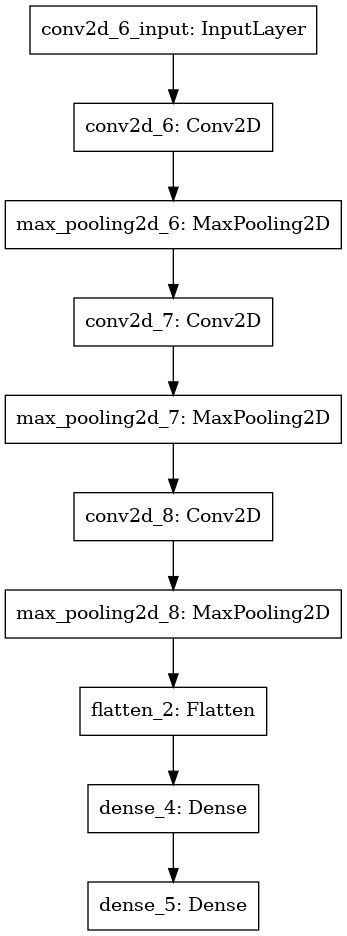

In [25]:
from keras.utils.vis_utils import plot_model
import tensorflow as tf
tf.keras.utils.plot_model(
model, to_file='model.png', show_shapes=False, show_dtype=False,
show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
)

In [26]:
model.evaluate(X_test_norm, test_y,workers=-1)

9/9 [==============================] - 0s 12ms/step - loss: 0.1406 - accuracy: 0.9675


[0.14060650765895844, 0.9675090312957764]

Confusion Matrix
[[75  1  0  0]
 [ 4 71  0  1]
 [ 0  0 60  0]
 [ 0  3  0 62]]
['White Spot', 'Fresh Fish', 'Black Spot', 'Red Spot']


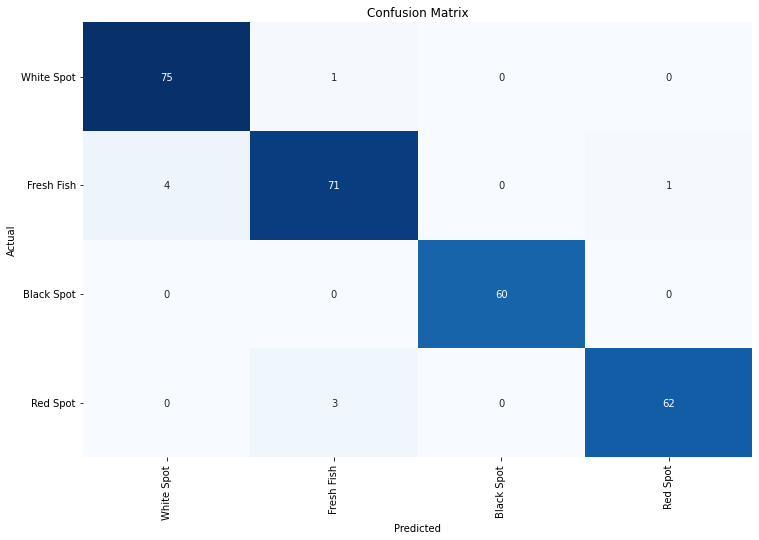

In [30]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np
import seaborn as sns
y_test_arg=np.argmax(test_y,axis=1)
Y_pred = np.argmax(model.predict(X_test_norm),axis=1)
print('Confusion Matrix')
cm=confusion_matrix(y_test_arg, Y_pred)
print(cm)
class_name={0:"White Spot",1:"Fresh Fish",2:"Black Spot",3:"Red Spot"}
classes=list(class_name.values())
print(classes)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
plt.xticks(np.arange(4)+.5,classes, rotation=90)
plt.yticks(np.arange(4)+.5, classes, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [31]:
print('classification report')
print(classification_report(y_test_arg,Y_pred,target_names=classes, digits= 4))

classification report
              precision    recall  f1-score   support

  White Spot     0.9494    0.9868    0.9677        76
  Fresh Fish     0.9467    0.9342    0.9404        76
  Black Spot     1.0000    1.0000    1.0000        60
    Red Spot     0.9841    0.9538    0.9688        65

    accuracy                         0.9675       277
   macro avg     0.9700    0.9687    0.9692       277
weighted avg     0.9678    0.9675    0.9675       277



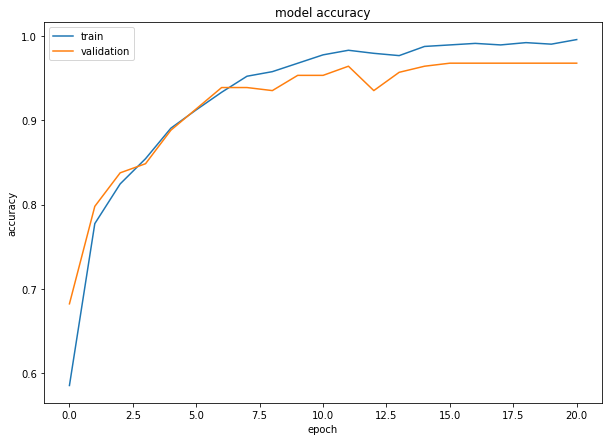

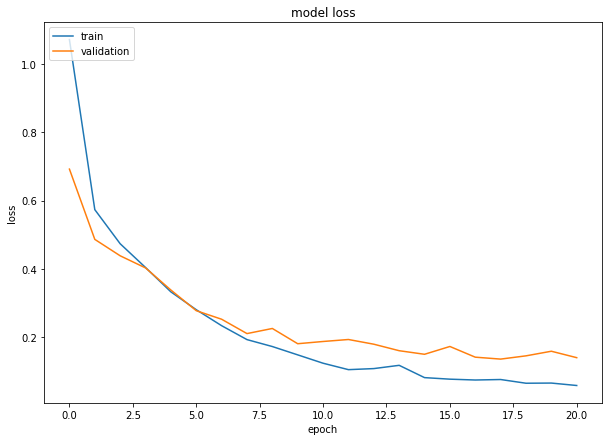

In [32]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [52]:
def img_for_pred(img_path):
 
    if img_path.startswith("/kaggle/input/fishdataset/combine/Prediction/red spot/"):
            img = cv2.imread(img_path)
            frame = cv2.resize(img,(224,224)) 

            
            kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
            image_sharp = cv2.filter2D(src=frame, ddepth=-1, kernel=kernel)
            hsv = cv2.cvtColor(image_sharp,cv2.COLOR_BGR2HSV)
        
           

            lower_red = np.array([0,50,50])
            upper_red = np.array([10,255,255])


            #upper red
            lower_red2 = np.array([170,50,50])
            upper_red2 = np.array([180,255,255])

            mask = cv2.inRange(hsv, lower_red, upper_red)
            res = cv2.bitwise_and(image_sharp,image_sharp, mask= mask)


            mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
            res2 = cv2.bitwise_and(image_sharp,image_sharp, mask= mask2)

            img3 = res+res2
            
            
            return img3
    
    elif img_path.startswith("/kaggle/input/fishdataset/combine/Prediction/fresh fish/"):
            img = cv2.imread(img_path)
            frame = cv2.resize(img,(224,224)) 

            
            kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
            image_sharp = cv2.filter2D(src=frame, ddepth=-1, kernel=kernel)
            
            return image_sharp

In [46]:
r=img_for_pred("/kaggle/input/fishdataset/combine/Prediction/red spot/EUS  (12).jpg")
r1=img_for_pred("/kaggle/input/fishdataset/combine/Prediction/red spot/EUS  (13).jpg")

In [63]:
original_red=cv2.imread("/kaggle/input/fishdataset/combine/Prediction/red spot/EUS  (12).jpg")
original1_red=cv2.imread("/kaggle/input/fishdataset/combine/Prediction/red spot/EUS  (13).jpg")

Text(0.5, 1.0, 'Preprocess')

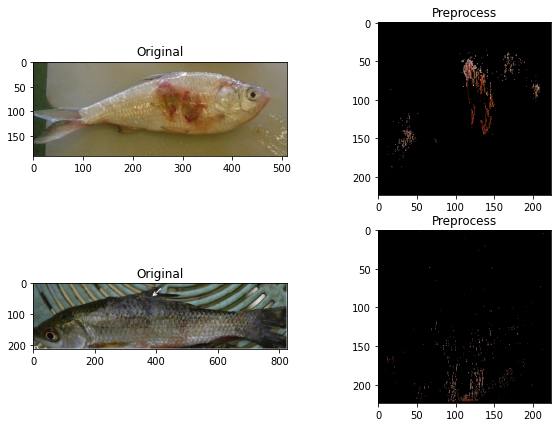

In [64]:
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(221)
plt.imshow(cv2.cvtColor(original_red, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.subplot(222)
plt.imshow(cv2.cvtColor(r, cv2.COLOR_BGR2RGB))
plt.title("Preprocess")
plt.subplot(223)
plt.imshow(cv2.cvtColor(original1_red, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.subplot(224)
plt.imshow(cv2.cvtColor(r1, cv2.COLOR_BGR2RGB))
plt.title("Preprocess")

In [65]:
p=model.predict(r[np.newaxis, ...])
labels ={0:"White Spot",1:"Fresh Fish",2:"Black Spot",3:"Red Spot"}
predicted_class = labels[np.argmax(p[0], axis=-1)]
print("Classified:", predicted_class, "\n\n")

Classified: Red Spot 




In [66]:
p=model.predict(r1[np.newaxis, ...])
labels ={0:"White Spot",1:"Fresh Fish",2:"Black Spot",3:"Red Spot"}
predicted_class = labels[np.argmax(p[0], axis=-1)]
print("Classified:", predicted_class, "\n\n")

Classified: Red Spot 




In [67]:
fresh=img_for_pred("/kaggle/input/fishdataset/combine/Prediction/fresh fish/local fish (1).jpg")
fresh1=img_for_pred("/kaggle/input/fishdataset/combine/Prediction/fresh fish/local fish (12).jpg")

In [68]:
original=cv2.imread("/kaggle/input/fishdataset/combine/Prediction/fresh fish/local fish (1).jpg")
original1=cv2.imread("/kaggle/input/fishdataset/combine/Prediction/fresh fish/local fish (12).jpg")

Text(0.5, 1.0, 'Preprocess')

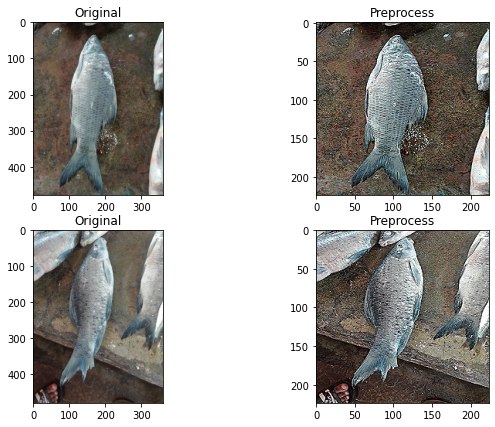

In [69]:
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(221)
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.subplot(222)
plt.imshow(cv2.cvtColor(fresh, cv2.COLOR_BGR2RGB))
plt.title("Preprocess")
plt.subplot(223)
plt.imshow(cv2.cvtColor(original1, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.subplot(224)
plt.imshow(cv2.cvtColor(fresh1, cv2.COLOR_BGR2RGB))
plt.title("Preprocess")

In [60]:
p=model.predict(fresh[np.newaxis, ...])
labels ={0:"White Spot",1:"Fresh Fish",2:"Black Spot",3:"Red Spot"}
predicted_class = labels[np.argmax(p[0], axis=-1)]
print("Classified:", predicted_class, "\n\n")

Classified: Fresh Fish 




In [61]:
p=model.predict(fresh1[np.newaxis, ...])
labels ={0:"White Spot",1:"Fresh Fish",2:"Black Spot",3:"Red Spot"}
predicted_class = labels[np.argmax(p[0], axis=-1)]
print("Classified:", predicted_class, "\n\n")

Classified: Fresh Fish 


